In [195]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline  

from utils.archiver import *

In [196]:
def plot_cube(cube, title="", cmap="jet", savefile=None, log=False):
    N = cube.shape[-1]
    n = int(np.ceil(np.sqrt(N)))
    m = int(np.ceil(N / float(n)))
    assert N <= n*m
    assert n <= 8
    
    vmin = np.min(cube)
    vmax = np.max(cube)
    
    norm = None
    if log:
        norm = LogNorm(vmin=vmin, vmax=vmax)
    
    plt.figure(figsize=(16,16))
    plt.title(title)
    for i in xrange(1,N):
        plt.subplot(n,m,i)
        plt.imshow(cube[:,:,i], interpolation="nearest",
                   cmap=cmap, 
                   vmin=vmin,
                   vmax=vmax,
                   norm=norm,)
        plt.colorbar()
    if savefile:
        plt.savefig(save)

In [197]:
unarch = Unarchiver('/home/epz/scratch/plane_refine.data')
NXY = 20+1
NT = 12+1
A = 3+1

In [198]:
p = unarch.p
P = np.reshape(p,(NXY*NXY*NT,A), order='F')  # Fortran order to convert stack vect into columns

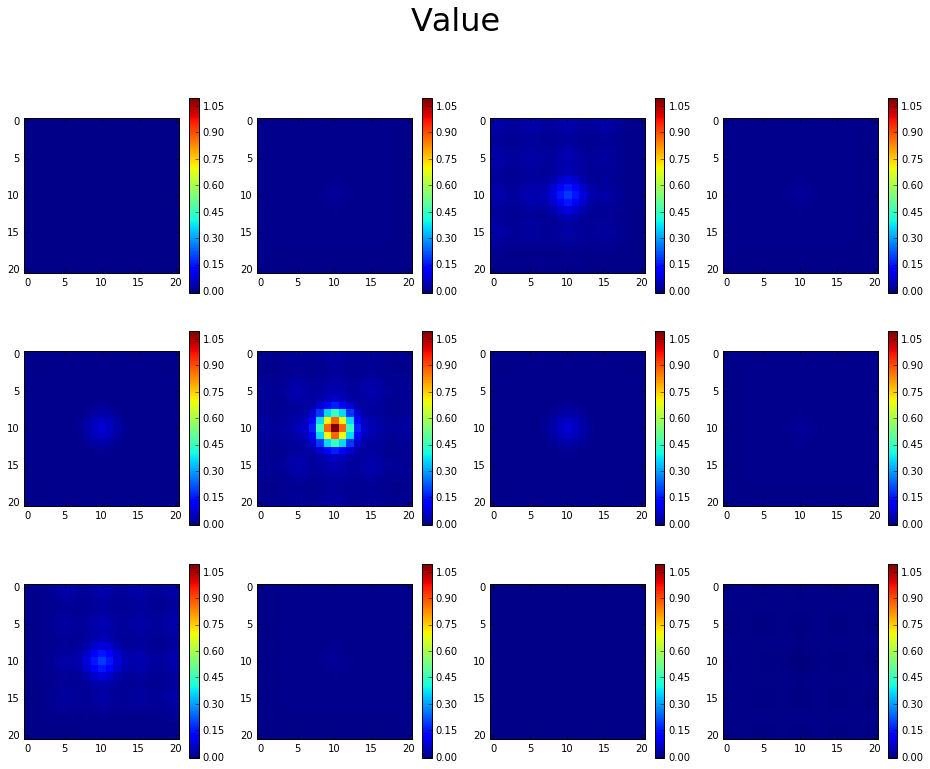

In [199]:
plot_cube(np.reshape(P[:,0], (NXY,NXY,NT)))
plt.suptitle('Value', fontsize=32)


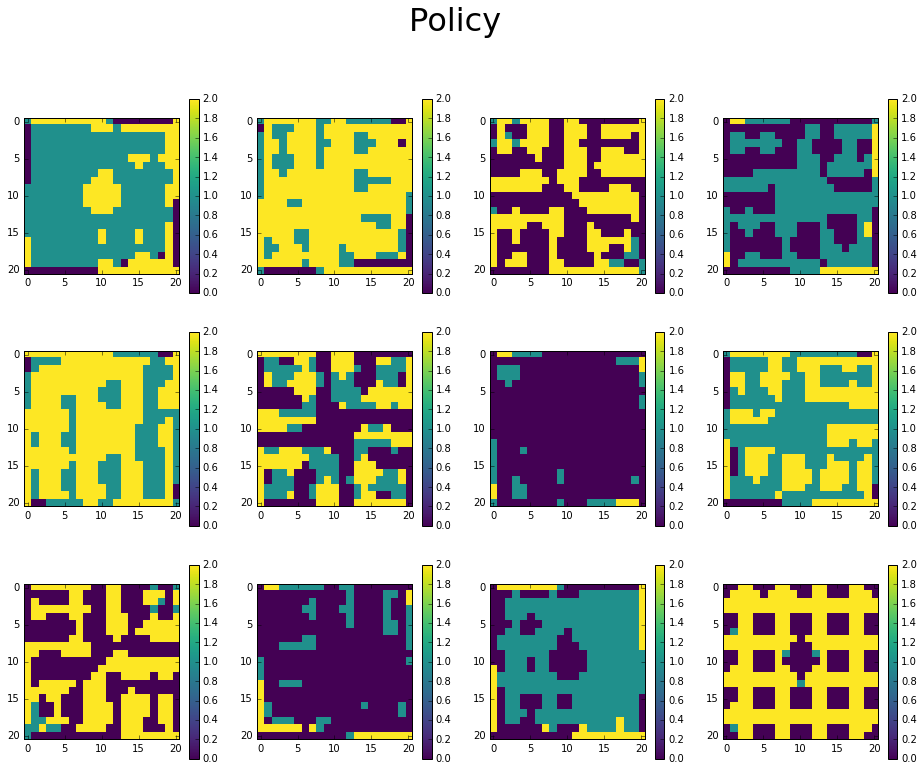

In [200]:
plot_cube(np.reshape(np.argmax(P[:,1:],axis=1), (NXY,NXY,NT)), cmap='viridis')
plt.suptitle('Policy', fontsize=32)

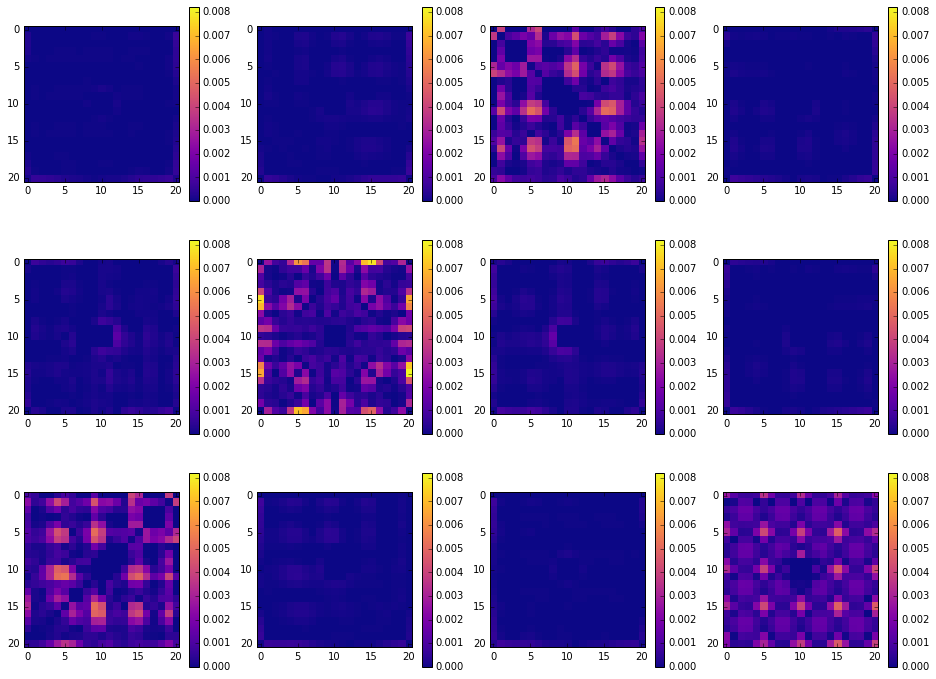

In [201]:
plt.suptitle('Advantage', fontsize=32)
sorted_P = np.sort(P[:,1:])
adv = sorted_P[:,-1] - sorted_P[:,-2]
plot_cube(np.reshape(adv, (NXY,NXY,NT)), cmap='plasma')


In [202]:
basis = unarch.basis
print(basis.shape)

(5733, 126)


In [203]:
d = unarch.d
D = np.reshape(d,(NXY*NXY*NT,A), order='F')  # Fortran order to convert stack vect into columns

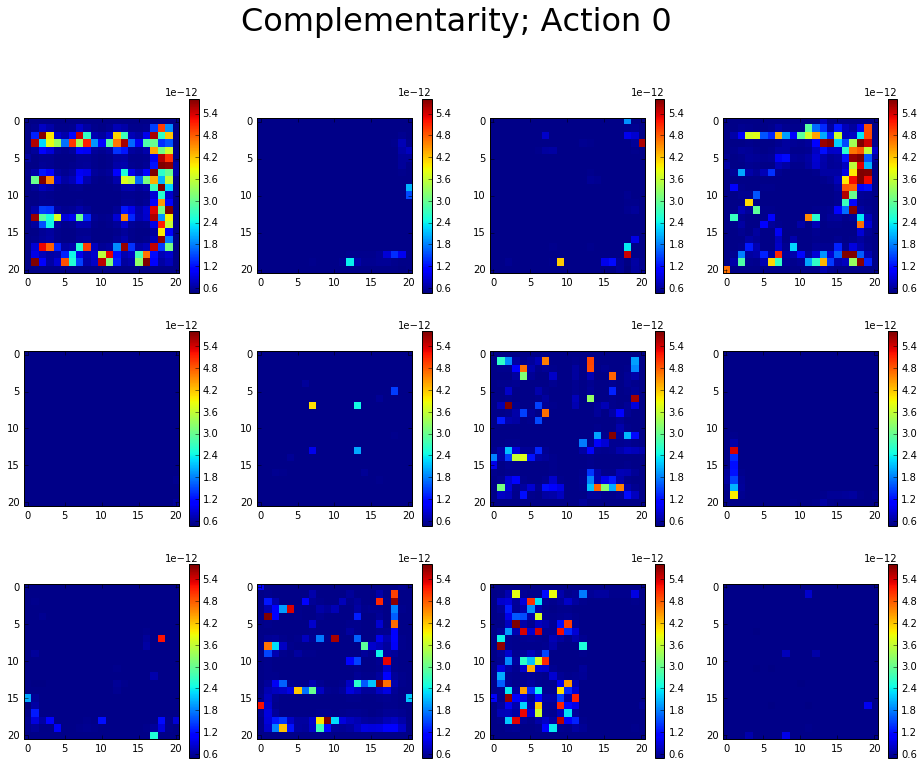

In [204]:
plot_cube(np.reshape(P[:,1] * D[:,1], (NXY,NXY,NT)))
plt.suptitle('Complementarity; Action 0', fontsize=32)

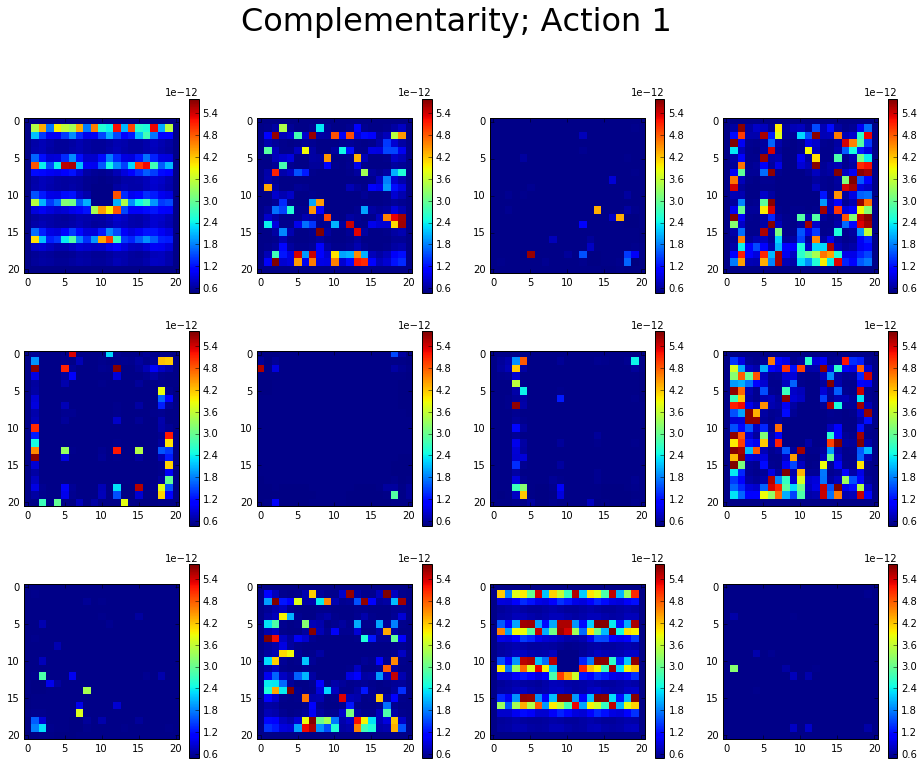

In [205]:
plot_cube(np.reshape(P[:,2] * D[:,2], (NXY,NXY,NT)))
plt.suptitle('Complementarity; Action 1', fontsize=32)

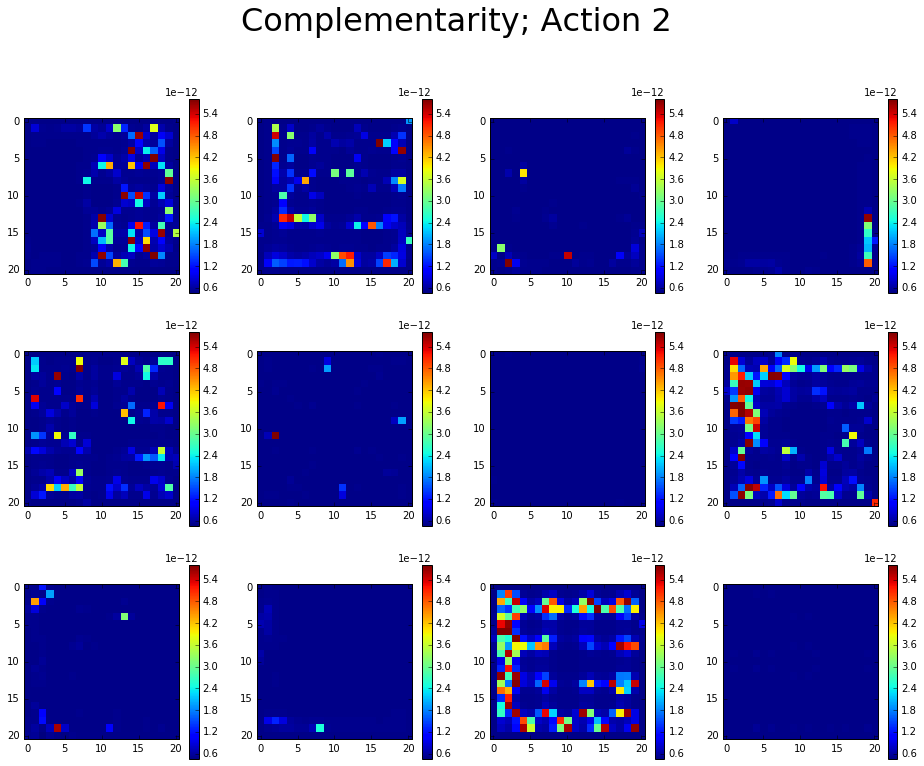

In [206]:
plot_cube(np.reshape(P[:,3] * D[:,3], (NXY,NXY,NT)))
plt.suptitle('Complementarity; Action 2', fontsize=32)

In [207]:
res = unarch.res

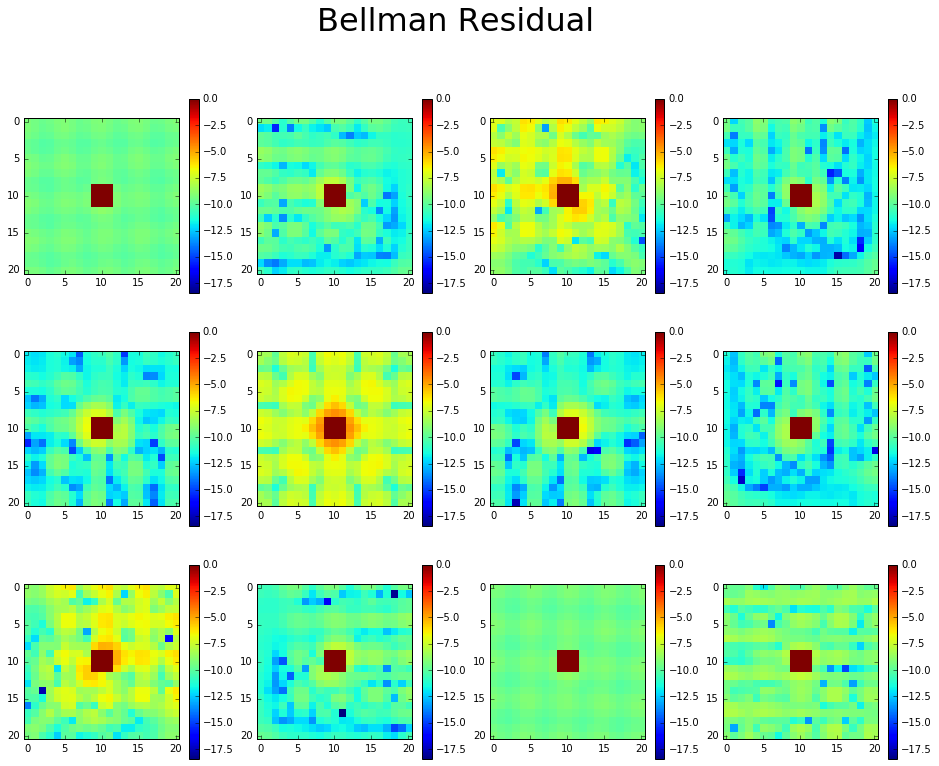

In [208]:
plot_cube(np.reshape(np.log(np.abs(res)), (NXY,NXY,NT)))
plt.suptitle('Bellman Residual', fontsize=32)

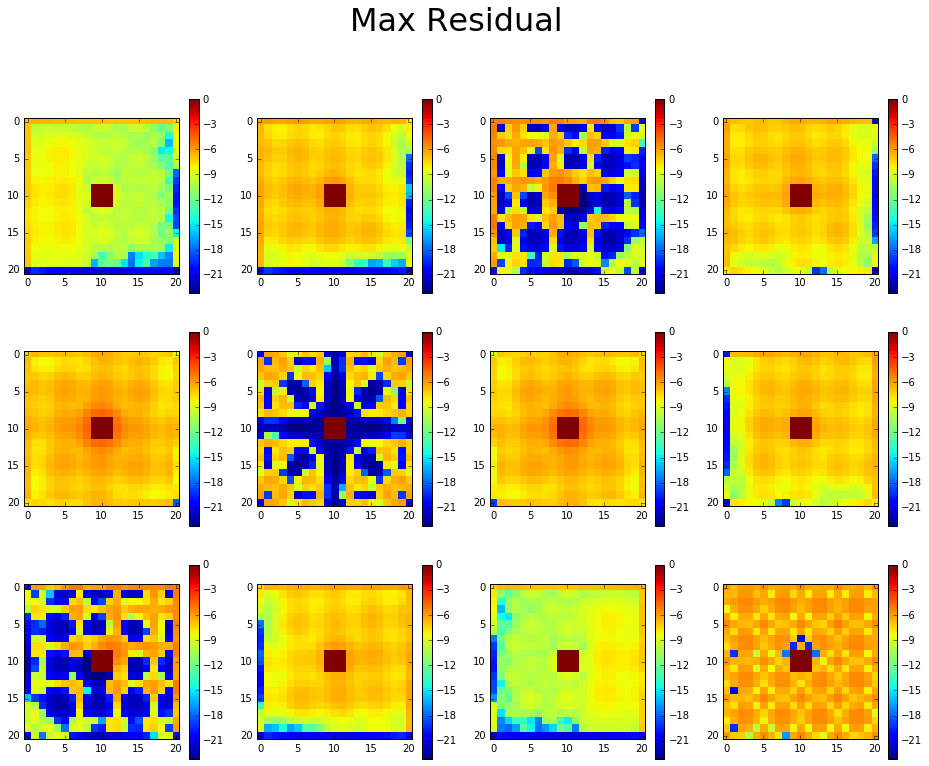

In [209]:
max_res = np.log(np.abs(np.max(D[:,1:],axis=1)))
max_res = np.reshape(max_res, (NXY,NXY,NT))
plot_cube(max_res)
plt.suptitle('Max Residual', fontsize=32)

In [210]:
unarch = Unarchiver('/home/epz/scratch/basis.data')
B = unarch.basis

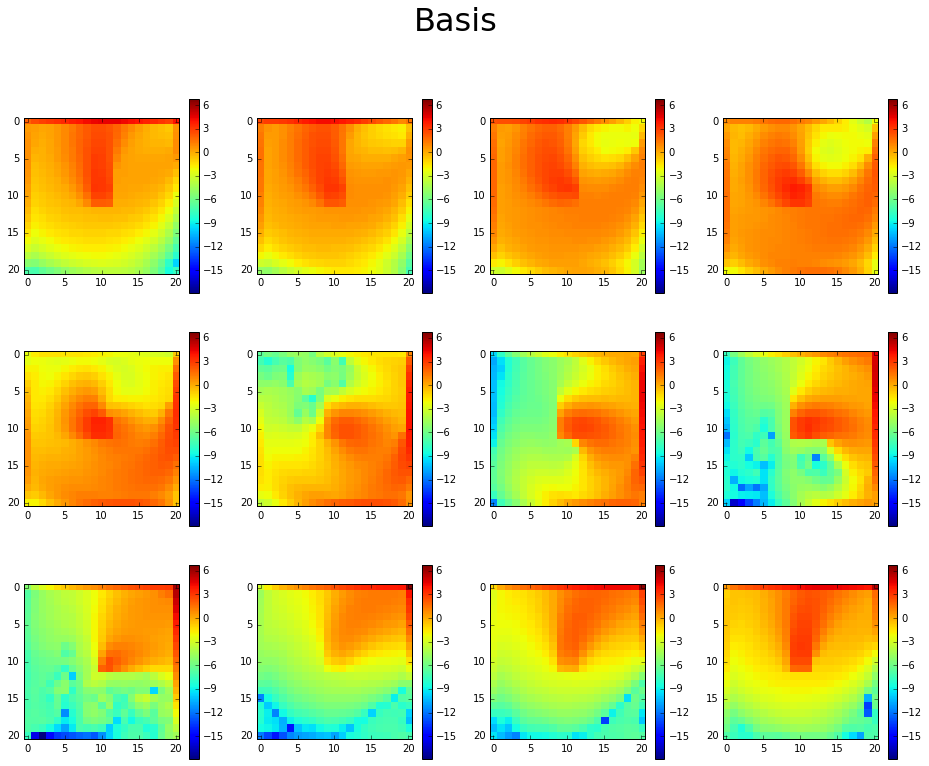

In [211]:
b = np.log(np.abs(B[:,0]) + 1e-22)
plot_cube(np.reshape(b, (NXY,NXY,NT)))
plt.suptitle('Basis', fontsize=32)